# Exploratory Data Analysis
This notebook is used to complete the exploratory data analysis portion of the report

## Load Data for Analysis

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [51]:
transactions = pd.read_csv('./Data/InitTraining.csv')

## Format dataset

In [52]:
transactions.replace({'Category' : {'Personal' : 'Personal Care'}}, inplace = True)
transactions.replace(',', '',regex=True, inplace=True)
transactions = transactions.astype({'Amount': float, 'Balance': float})
transactions['Date'] = pd.to_datetime(transactions['Date'])

## Obtain the summary statistics from the dataset

In [53]:
def summaryStatstics(category):
    # Location
    mean = category['Amount'].mean()
    # Spread
    std = category['Amount'].std()
    
    # five number summary
    minimum = category['Amount'].min()
    lower_quartile = category['Amount'].quantile(0.25)
    median =category['Amount'].median()
    upper_quartile = category['Amount'].quantile(0.75)
    maximum = category['Amount'].max()
    
    return {'category': category['Category'].unique(), 'mean': mean, 'std': std, 'minimum': minimum, 'lower quartile': lower_quartile, 'median': median, 'upper quartile': upper_quartile, 'maximum': maximum}
    

### Summary Statistics of Categories
Categories:
- Food
- Housing
- Utilities
- Personal Care
- Entertainment
- Income
- Transportation
- Debt
- Lifestyle
- Bank
- Investment
- Savings

In [54]:
food_statistics = summaryStatstics(transactions[transactions['Category'] == 'Food & Drinks'])
food_dataframe = transactions[transactions['Category'] == 'Food & Drinks']

In [55]:
def printSummary(statistics):
    print(f'Summary Statistics for {statistics["category"]}:')
    print('Amount Mean: {:.2f}'.format(statistics['mean']))
    print('Amount Standard Deviation: {:.2f}'.format(statistics["std"]))
    print('Amount Minimum: {:.2f}'.format(statistics["minimum"]))
    print('Amount Lower Quartile: {:.2f}'.format(statistics["lower quartile"]))
    print('Amount Median: {:.2f}'.format(statistics["median"]))
    print('Amount Upper Quartile: {:.2f}'.format(statistics["upper quartile"]))
    print('Amount Maximum: {:.2f}'.format(statistics["maximum"]))

In [56]:
printSummary(food_statistics)

Summary Statistics for ['Food & Drinks']:
Amount Mean: -43.78
Amount Standard Deviation: 38.03
Amount Minimum: -200.00
Amount Lower Quartile: -75.50
Amount Median: -39.72
Amount Upper Quartile: -5.74
Amount Maximum: -5.74


<Axes: xlabel='Amount'>

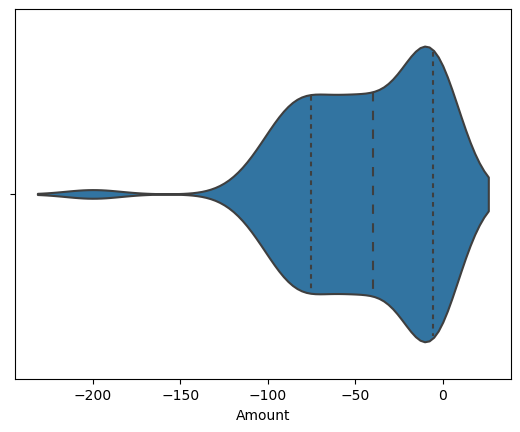

In [77]:
sns.violinplot(x=food_dataframe['Amount'], inner='quart')

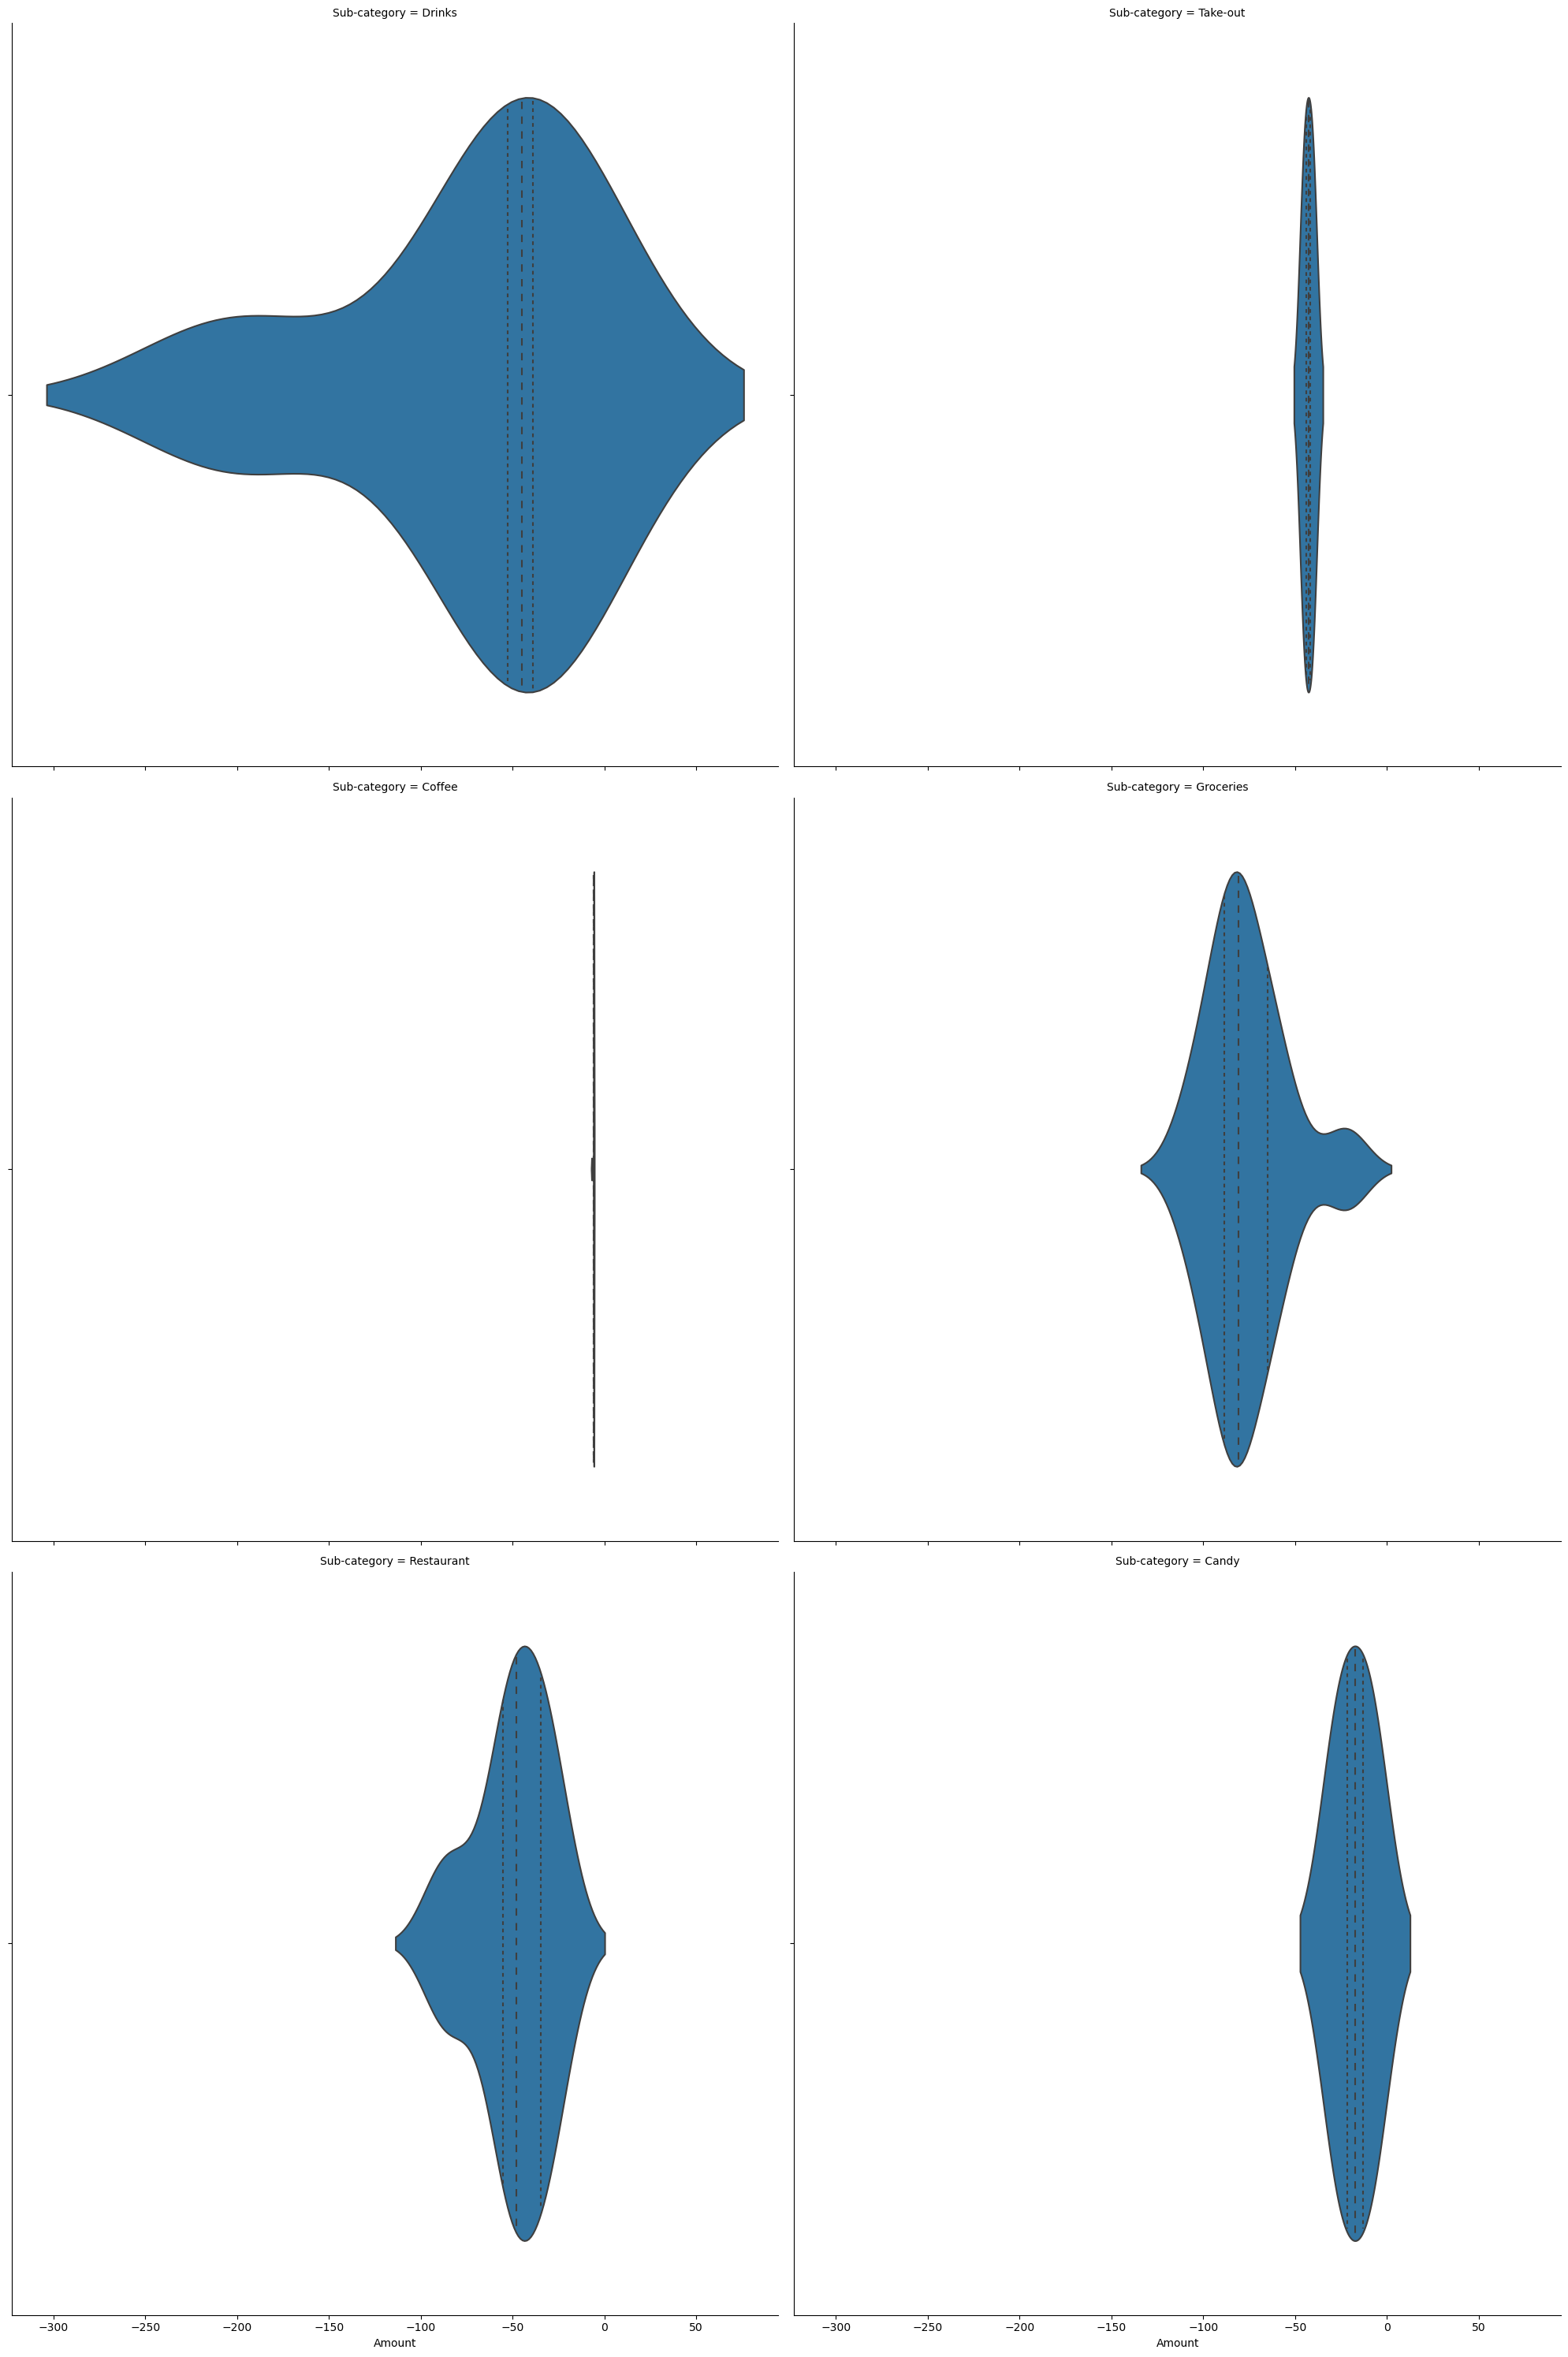

In [93]:
grid = sns.FacetGrid(food_dataframe, col='Sub-category', col_wrap=2, height=10)
grid.map(sns.violinplot, 'Amount', order=food_dataframe['Sub-category'].unique(), inner='quart')

<Axes: xlabel='Amount'>

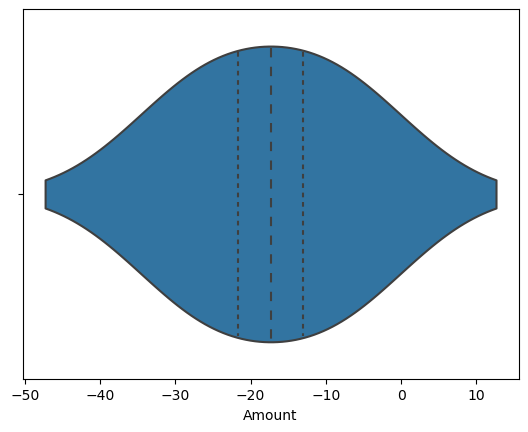

In [94]:
sns.violinplot(x=food_dataframe[food_dataframe['Sub-category'] == 'Candy']['Amount'], inner='quart')